# Assignment

Research question:

What was the effect of COVID-19 on transport emission levels in Europe, comparing the pre-pandemic period with the pandemic period?

Sub-questions:
1. Among CO2, PM10, PM2.5, and NOx emissions, which substance experienced the most substantial decline during the pandemic?
2. Which European countries exhibited the most significant and least significant differences in transport-related emissions due to the pandemic?
3. Are variations in the effect of COVID-19 on transportation emissions correlated with a country's GDP?

## Import libraries

In [17]:
import pandas as pd
from pathlib import Path
import numpy as np
import math
import scipy
from scipy.signal import find_peaks
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas as gpd


## Part I - Data import

Here comes the first part of the assignment. Importing the filtered data. Create a dataframe.
Show the data in a table.


In [18]:
file_path1 = 'GHG.csv'
file_path2 = 'NOx_data.csv'
file_path3 = '2.5.csv'
file_path4 = '10.csv'
file_path5 = 'Definitief_GDP.csv'


df_GHG = pd.read_csv(file_path1, sep = ',',encoding='ISO-8859-1')
df_NOx = pd.read_csv(file_path2, sep = ';',encoding='ISO-8859-1')
df_twofive = pd.read_csv(file_path3, sep = ';',encoding='ISO-8859-1')
df_ten = pd.read_csv(file_path4, sep = ';',encoding='ISO-8859-1')
df_GDP = pd.read_csv(file_path5, sep = ';',encoding='ISO-8859-1')

# The file had an incorrect delimiter which caused a ParserError,
# this is solved by adding sep=';' when reading the file. 
# This file also gave some UnicodeDecodeErorr, this is solved 
# by using encoding='ISO-8859-1'



In [19]:
df_GHG


,Greenhouse gasses,2019,2020
0,Belgium,334.90,480.47
1,Bulgaria,9405.54,9365.55
2,Czechia,11267.85,7778.07
3,Denmark,3101.71,2953.37
4,Germany,4196.84,6822.26
5,Estonia,2509.07,1149.49
6,Ireland,7042.45,6657.07
7,Greece,5416.18,5400.73
8,Spain,44094.76,45229.39
9,France,21621.85,18226.97


The next code will filter the CSV files


In [4]:
#time to filter the imported data. Delete the empty column, switch the columns in chronological orders, get rid of the comma's in the numbers.

# Drop the column 'Unnamed: 2'
#df_GHG.drop('Unnamed: 2', axis=1, inplace=True)

# Save the modified DataFrame back to the CSV file
#df.to_csv('your_file.csv', index=False)

# Get the list of column names for the code that will switch the columns
#cols = list(df_GHG.columns)

# Assume you want to switch columns named 'Column1' and 'Column2'
#col1_index = cols.index('2020')
#col2_index = cols.index('2019')

# Swap the column names in the list
#cols[col1_index], cols[col2_index] = cols[col2_index], cols[col1_index]

# Reindex the DataFrame with the modified column list
#df_GHG2 = df_GHG[cols]
#df_GHG2 = df_GHG
#df_GHG2.to_csv('GHG.csv', index=False)

#getting rid of the commas in the csv file so that python can read it properly.
#df_GHG['2019'] = df_GHG['2019'].str.replace(',', '').astype(float)
#df_GHG['2020'] = df_GHG['2020'].str.replace(',', '').astype(float)
#df_GHG.to_csv('GHG.csv', index=False)



In [20]:
df_GDP

,ï»¿TIME,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,GEO (Labels),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,European Union - 27 countries (from 2020),18.400,19.200,19.900,20.300,21.200,22.000,23.2,24.6,25.3,...,26.0,26.6,27.5,28.2,29.3,30.3,31.3,30.0,32.500,35.200
2,European Union - 28 countries (2013-2020),18.800,19.700,20.400,20.900,21.800,22.600,23.8,25.0,25.7,...,26.4,27.0,27.9,28.5,29.6,30.5,31.5,30.0,:,:
3,European Union - 27 countries (2007-2013),18.900,19.800,20.400,21.000,21.900,22.700,23.8,25.1,25.8,...,26.5,27.1,28.0,28.6,29.7,30.6,31.6,30.1,:,:
4,Euro area â 20 countries (from 2023),20.900,21.800,22.500,22.900,23.700,24.600,25.8,27.1,27.7,...,28.0,28.5,29.4,30.2,31.2,32.1,33.1,31.5,33.900,36.600
5,Euro area - 19 countries (2015-2022),21.100,22.000,22.600,23.100,23.800,24.700,26.0,27.3,27.8,...,28.2,28.7,29.6,30.3,31.4,32.3,33.2,31.6,34.000,36.700
6,Belgium,23.100,23.800,24.800,25.400,26.200,27.200,28.0,29.0,29.4,...,31.5,32.2,33.2,33.8,34.6,35.6,36.8,35.7,39.000,42.200
7,Bulgaria,5.300,5.800,6.400,6.900,7.500,8.300,9.0,10.0,10.9,...,12.0,12.6,13.2,13.9,14.7,15.6,16.6,16.6,18.600,20.700
8,Czechia,13.500,14.600,15.000,16.000,17.100,18.100,19.0,20.7,21.6,...,22.2,23.3,24.4,25.1,26.7,27.9,29.2,28.0,29.700,32.000
9,Denmark,23.800,24.400,25.100,25.300,26.900,28.000,29.7,30.8,32.0,...,33.7,34.3,35.3,36.1,38.0,39.0,39.5,39.9,43.000,48.100


In [21]:
df_GDP = df_GDP.rename(columns={'ï»¿TIME': 'Country'})

for i in range(2000,2023):
    if i == 2019 or i == 2020:
        continue
    else:
        df_GDP.drop(str(i), axis=1, inplace=True)

for i in range(0, 6):
    df_GDP.drop(i, axis=0, inplace=True)

for i in range(43, 46):
    df_GDP.drop(i, axis=0, inplace=True)

#df_GDP['2019'] = df_GDP['2019'].str.replace(',', '').astype(float)
#df_GDP['2020'] = df_GDP['2020'].str.replace(',', '').astype(float)

df_GDP['Country'] = df_GDP['Country'].replace('TÃ¼rkiye', 'Turkiye')

df_GDP

,Country,2019,2020
6,Belgium,36.8,35.7
7,Bulgaria,16.6,16.6
8,Czechia,29.2,28.0
9,Denmark,39.5,39.9
10,Germany,37.9,37.0
11,Estonia,25.8,25.8
12,Ireland,59.3,61.6
13,Greece,20.6,18.6
14,Spain,28.5,24.9
15,France,33.1,31.4


## Part II - Data processing

#### 1. Among GHG, NOx, PM2.5 and PM10 emissions, which substance experienced the most substantial decline during the pandemic?

In [7]:
# we first get the total value of an emission in the year 2019 and 2020 of all the data set countries
# we start with GHG emissions and eventually want to do all other emissions as well
# in the end we compare the differences in a bar chart to get to our conclusion of which substance has experienced the biggest decline 


# Getting the sum of the column 2019 and 2020 of the GHG dataset
total_GHG_emissions_2019 = round(df_GHG['2019'].sum(),2)
total_GHG_emissions_2020 = round(df_GHG['2020'].sum(),2)

#total_NOx_emissions_2019 = round(df_NOx['2019'].sum(),2)
#total_NOx_emissions_2020 = round(df_NOx['2020'].sum(),2)

#total_PM2_5_emissions_2019 = round(df_twofive['2019'].sum(),2)
#total_PM2_5_emissions_2020 = round(df_twofive['2020'].sum(),2)

#total_PM10_emissions_2019 = round(df_ten['2019'].sum(),2)
#total_PM10_emissions_2020 = round(df_ten['2020'].sum(),2)


#Print the total emissions just to check if the summation code works.
print(total_GHG_emissions_2019)
print(total_GHG_emissions_2020)

337198.7
323487.75


#### 2. Which European countries exhibited the most significant and least significant differences in transport-related emissions due to the pandemic?

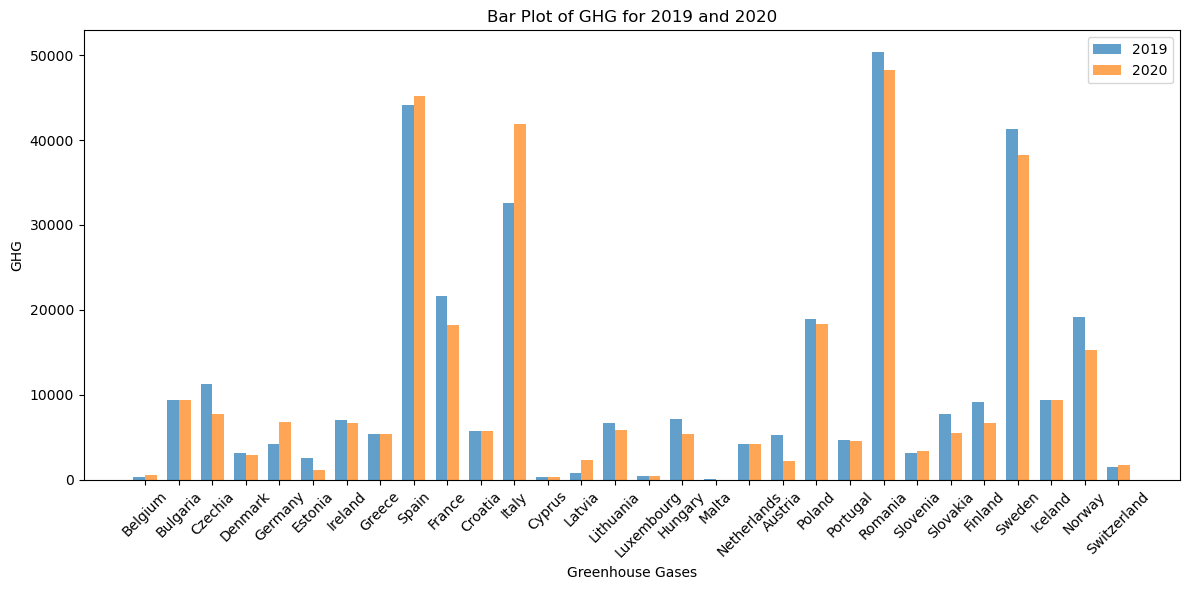

In [8]:

# Sample data
countries = df_GHG['Greenhouse gasses']
ghg_2019 = df_GHG['2019']
ghg_2020 = df_GHG['2020']

# Create an array of x values for the bar positions
x = np.arange(len(countries))

# Set the width of the bars
bar_width = 0.35

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(x - bar_width/2, ghg_2019, bar_width, label='2019', alpha=0.7)
plt.bar(x + bar_width/2, ghg_2020, bar_width, label='2020', alpha=0.7)

# Set the x-tick labels to be the country names
plt.xticks(x, countries, rotation=45)

# Set labels and title
plt.xlabel('Greenhouse Gases')
plt.ylabel('GHG')
plt.title('Bar Plot of GHG for 2019 and 2020')
plt.legend()

plt.tight_layout()
plt.show()


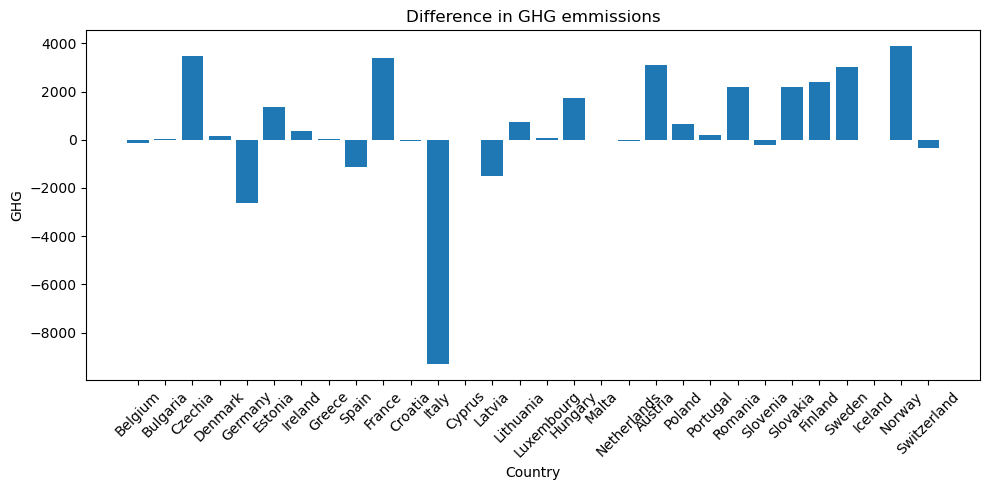

In [9]:

# Creating a bar plot of a column against another column 
# Creating the bar plot
plt.figure(figsize=(10, 5))  # Optional: You can set the figure size
plt.bar(df_GHG['Greenhouse gasses'], (df_GHG['2019'] - df_GHG['2020']))
plt.xlabel('Country')
plt.ylabel('GHG')
plt.title('Difference in GHG emmissions')
plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
min_ghg = df_GHG['2020'].min()
max_ghg = df_GHG['2020'].max()

# Generate evenly spaced y-ticks. Here we're generating 10 ticks for illustration, but you can change this.
yticks = np.linspace(min_ghg, max_ghg, 10)
#plt.yticks(yticks)
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlapping
    
# Displaying the plot
plt.show()

#### 3. Are variations in the effect of COVID-19 on transportation emissions correlated with a country's GDP?

In [22]:
df_GDP

,Country,2019,2020
6,Belgium,36.8,35.7
7,Bulgaria,16.6,16.6
8,Czechia,29.2,28.0
9,Denmark,39.5,39.9
10,Germany,37.9,37.0
11,Estonia,25.8,25.8
12,Ireland,59.3,61.6
13,Greece,20.6,18.6
14,Spain,28.5,24.9
15,France,33.1,31.4


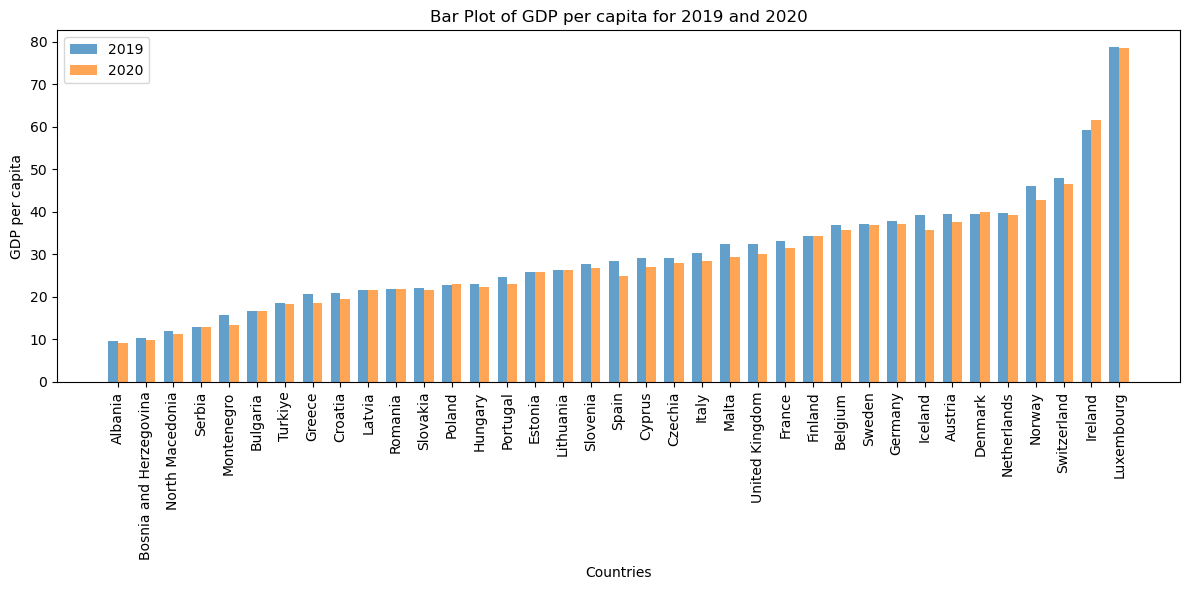

In [25]:
# Sample data
countries2 = df_GDP['Country']
gdp_2019 = df_GDP['2019']
gdp_2020 = df_GDP['2020']

# Sort the data in ascending order based on GDP for the year 2019
sorted_indices = np.argsort(gdp_2019)
countries2 = countries2.iloc[sorted_indices]
gdp_2019 = gdp_2019.iloc[sorted_indices]
gdp_2020 = gdp_2020.iloc[sorted_indices]

# Create an array of x values for the bar positions
x = np.arange(len(countries2))

# Set the width of the bars
bar_width = 0.35

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(x - bar_width/2, gdp_2019, bar_width, label='2019', alpha=0.7)
plt.bar(x + bar_width/2, gdp_2020, bar_width, label='2020', alpha=0.7)

# Set the x-tick labels to be the country names
plt.xticks(x, countries2, rotation=90)

# Set labels and title
plt.xlabel('Countries')
plt.ylabel('GDP per capita')
plt.title('Bar Plot of GDP per capita for 2019 and 2020')
plt.legend()

plt.tight_layout()
plt.show()

## Part III - Data visualisation

Conclusion. Relate found info from Part II to our RQ. Perhaps with graphs, maps, etc. 